# Uber Ride Analytics: Step-by-Step Exploratory Data Analysis (EDA)

This notebook provides a structured, step-by-step EDA of the `ncr_ride_bookings.csv` dataset from the Uber ride analytics dashboard.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, and any other libraries needed for EDA.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load the Dataset
Load the dataset into a pandas DataFrame from the CSV file.

In [5]:
# Load the dataset
file_path = '/Users/hc/Documents/uber/uber-customer-segmentation/data/ncr_ride_bookings.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## 3. View Basic Information
Display the first few rows, shape, and data types of the DataFrame.

In [3]:
# View basic information about the DataFrame
print('Shape of DataFrame:', df.shape)
df.info()

Shape of DataFrame: (150000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason

## 4. Check for Missing Values
Identify missing values in the dataset using isnull() and sum().

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

## 5. Summary Statistics
Use describe() and value_counts() to get summary statistics for numerical and categorical columns.

In [5]:
# Summary statistics for numerical columns
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
# Summary statistics for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())


Value counts for Date:
Date
2024-11-16    462
2024-05-09    456
2024-09-18    456
2024-01-26    452
2024-02-06    452
             ... 
2024-04-23    369
2024-10-11    365
2024-11-18    358
2024-05-02    357
2024-08-22    355
Name: count, Length: 365, dtype: int64

Value counts for Time:
Time
17:44:57    16
19:17:33    12
10:23:23    11
15:23:56    11
18:59:55    11
            ..
09:35:05     1
02:40:23     1
07:50:35     1
16:32:46     1
12:31:22     1
Name: count, Length: 62910, dtype: int64

Value counts for Booking ID:
Booking ID
"CNR7908610"    3
"CNR9603232"    3
"CNR7199036"    3
"CNR6337479"    3
"CNR5292943"    3
               ..
"CNR1099696"    1
"CNR7686931"    1
"CNR8314394"    1
"CNR1224369"    1
"CNR3447390"    1
Name: count, Length: 148767, dtype: int64

Value counts for Booking Status:
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, d

## 6. Visualize Distributions
Create histograms, boxplots, and countplots to visualize the distributions of features.

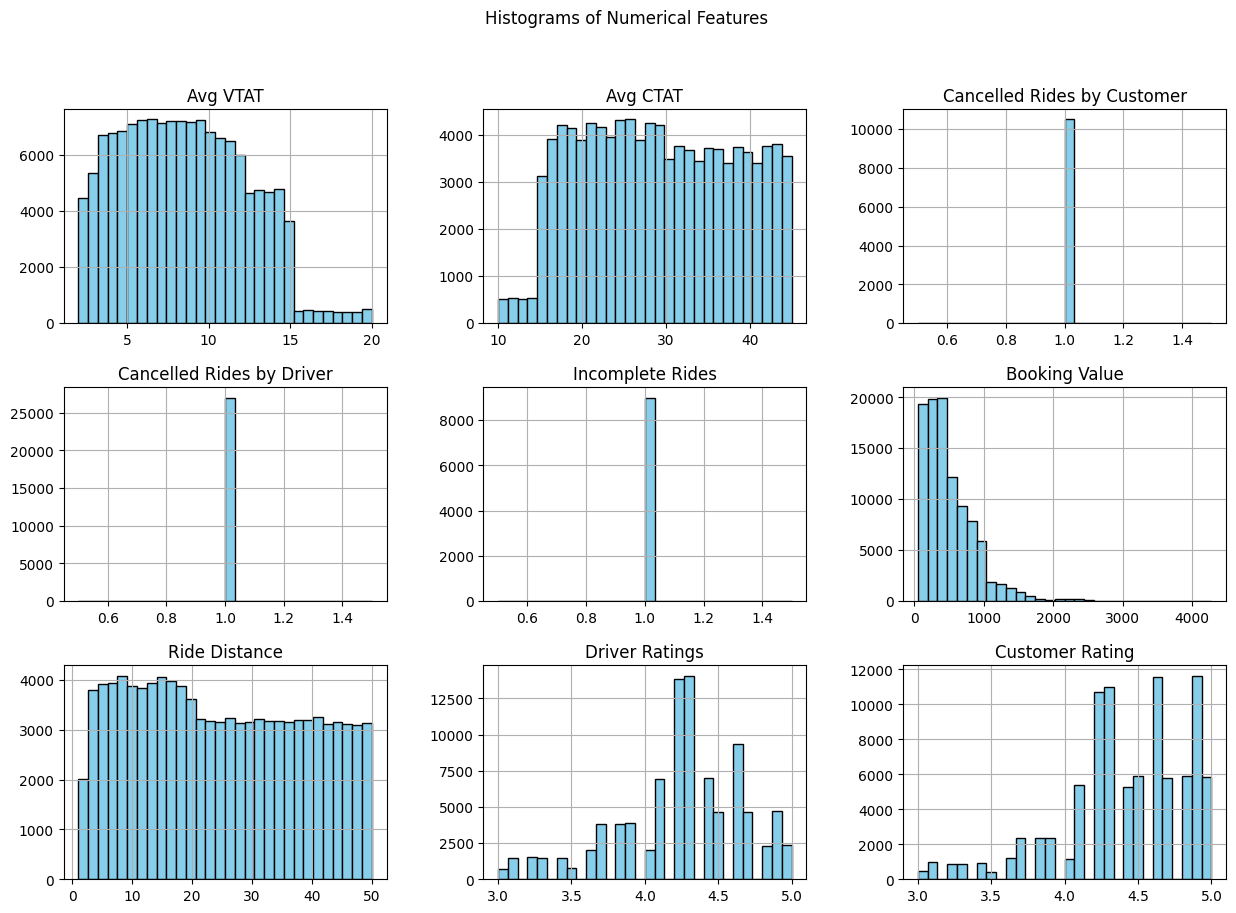

In [7]:
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

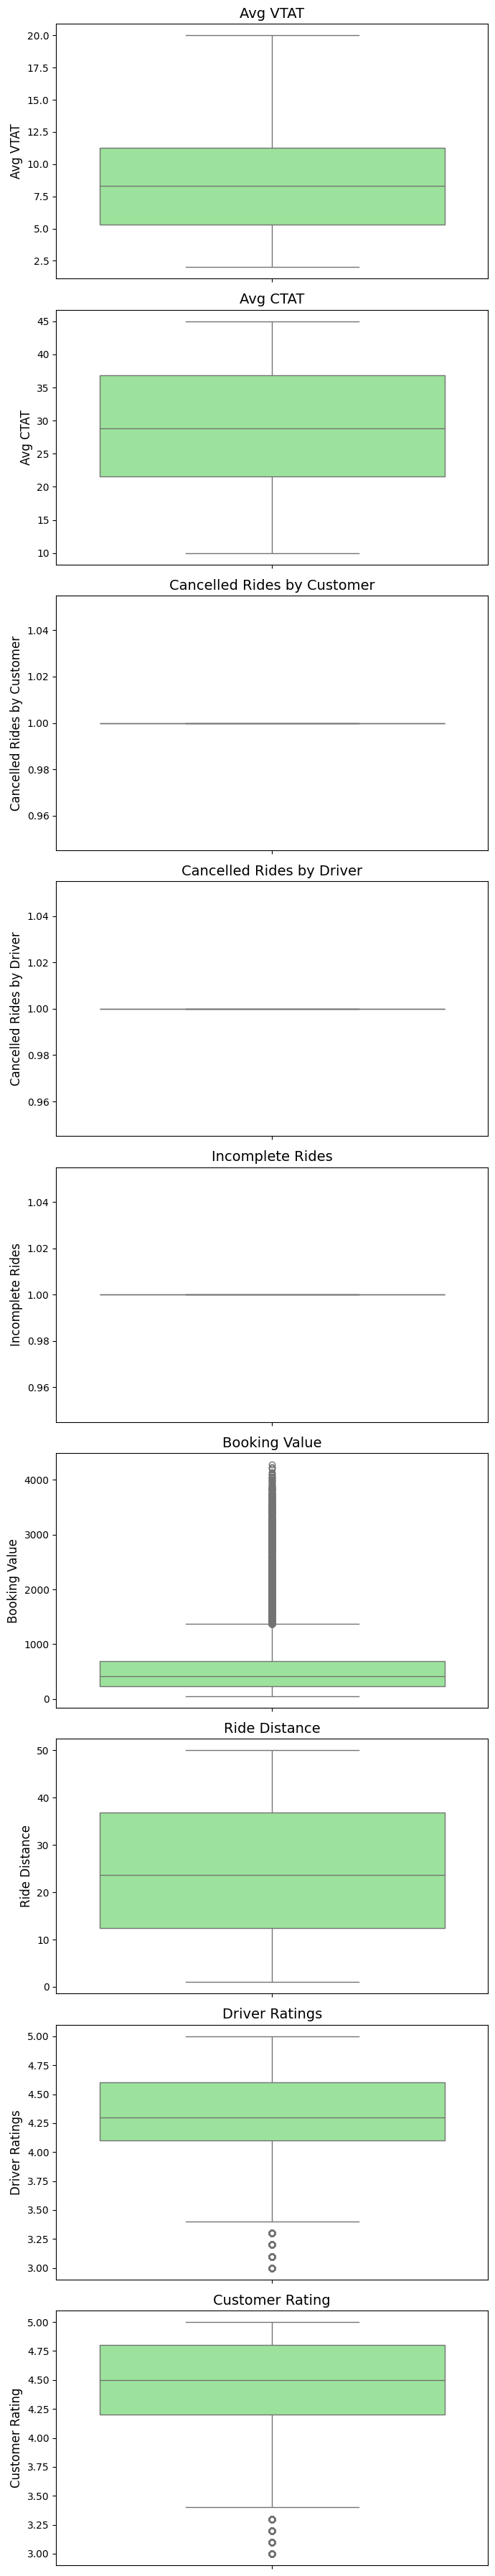

In [8]:
# Boxplots for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 1
n_rows = len(numerical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7, 4 * n_rows))
if n_rows == 1:
    axes = [axes]
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()

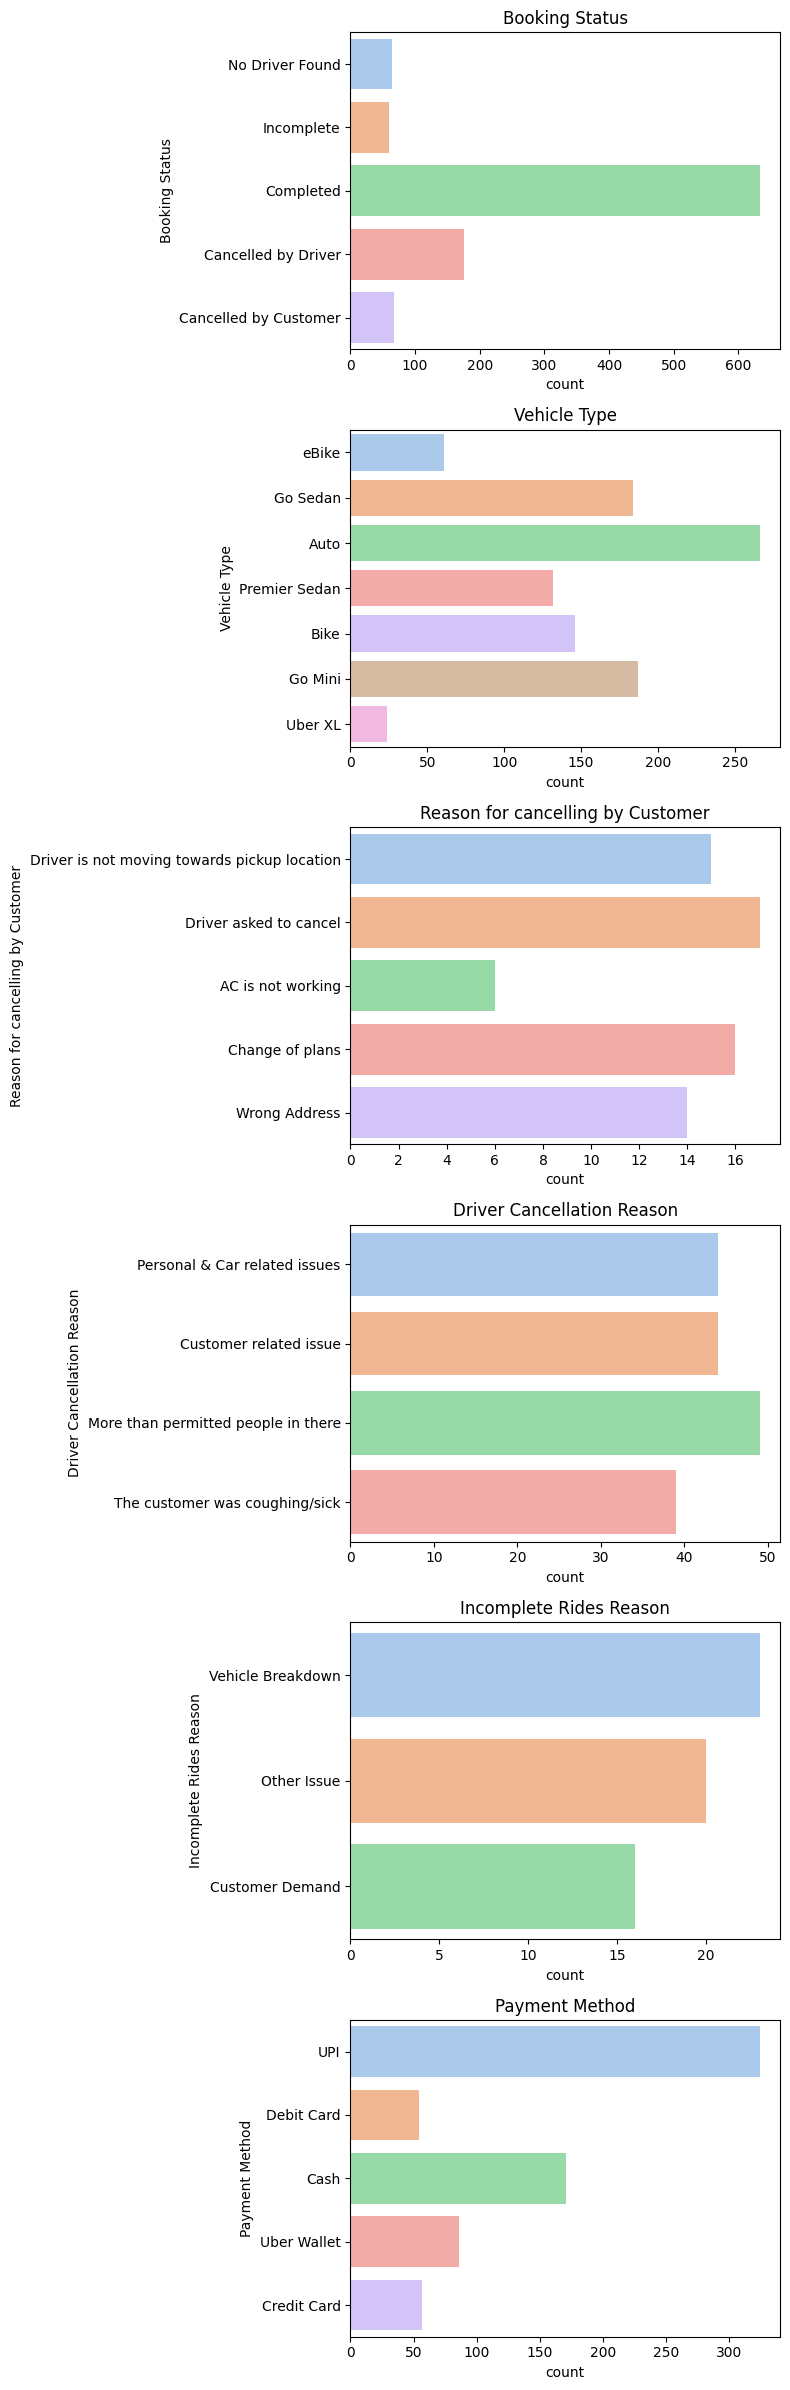

In [12]:
# Countplots for categorical features (only columns with <10 unique values, using first 1000 samples)
sample_df = df.head(1000)
small_cat_cols = [col for col in categorical_cols if sample_df[col].nunique() < 10]
if small_cat_cols:
    plt.figure(figsize=(8, 4 * len(small_cat_cols)))
    for i, col in enumerate(small_cat_cols, 1):
        plt.subplot(len(small_cat_cols), 1, i)
        sns.countplot(y=sample_df[col], palette='pastel')
        plt.title(col)
    plt.tight_layout()
    plt.show()
else:
    print('No categorical columns with fewer than 10 unique values to plot.')

## 7. Explore Relationships Between Features
Use scatter plots, pairplots, and correlation heatmaps to explore relationships between variables.

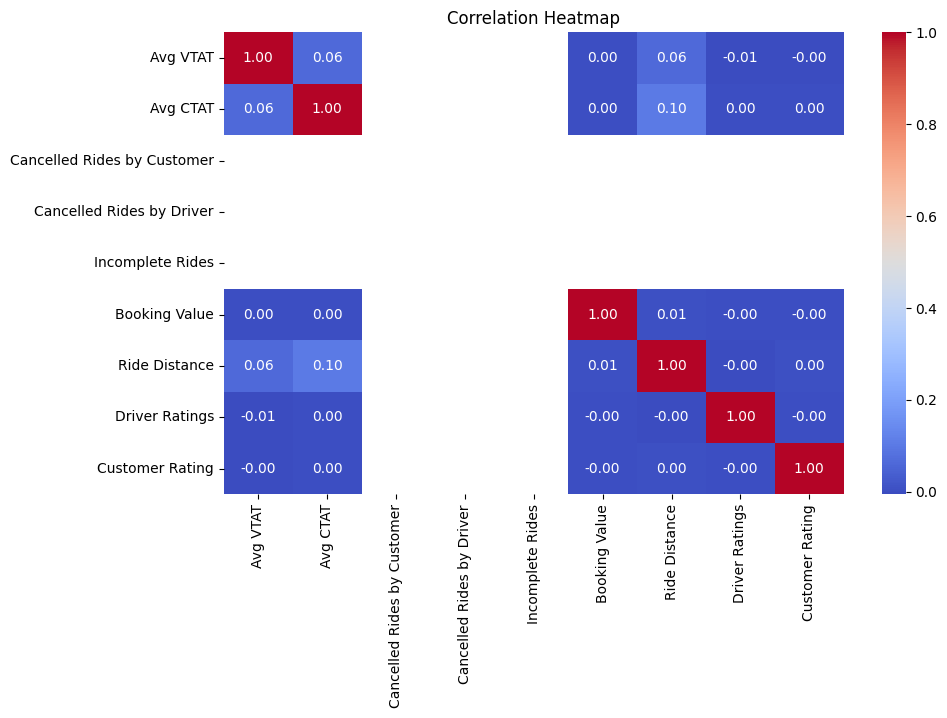

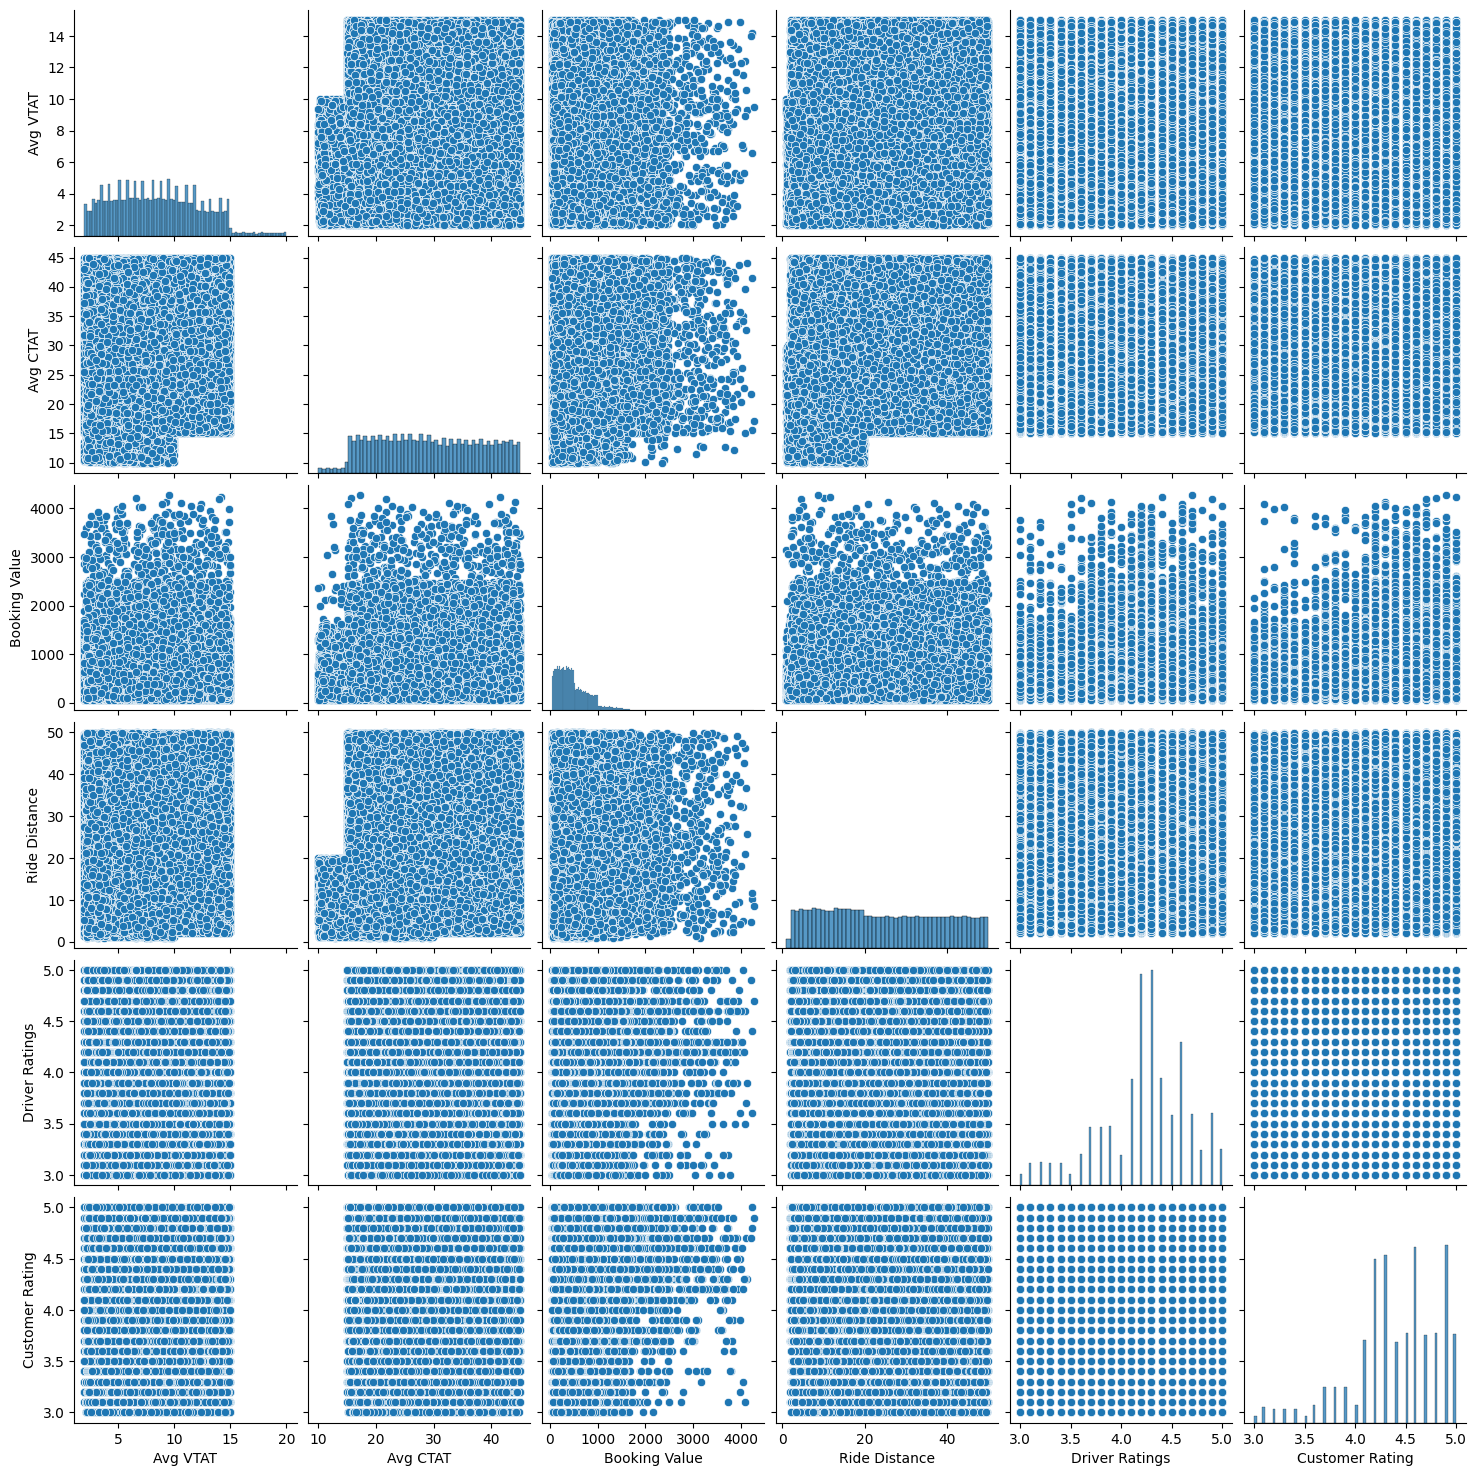

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for numerical features (only columns with >1 unique value)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if df[col].nunique() > 1]
if numeric_cols:
    sns.pairplot(df[numeric_cols])
    plt.show()
else:
    print('No numerical columns with more than one unique value for pairplot.')

## 8. Handle Missing or Outlier Values
Demonstrate techniques for handling missing data and outliers, such as imputation or removal.

In [19]:
# Check dataset size before handling missing values
shape_before = df.shape
print('Shape before handling missing values:', shape_before)

# Handling missing values (fill with median for numerical, mode for categorical)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Check dataset size after handling missing values
shape_after = df.shape
print('Shape after handling missing values:', shape_after)
if shape_before == shape_after:
    print('No rows were removed during missing value handling.')
else:
    print(f'Rows removed: {shape_before[0] - shape_after[0]}')

# Handling outliers using IQR (capping)
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

df.head()

Shape before handling missing values: (150000, 21)
Shape after handling missing values: (150000, 21)
No rows were removed during missing value handling.


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,...,Wrong Address,1.0,Customer related issue,1.0,Customer Demand,414.0,23.72,4.30,4.5,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Wrong Address,1.0,Customer related issue,1.0,Vehicle Breakdown,237.0,5.73,4.30,4.5,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Wrong Address,1.0,Customer related issue,1.0,Customer Demand,627.0,13.58,4.45,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Wrong Address,1.0,Customer related issue,1.0,Customer Demand,416.0,34.02,4.45,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Wrong Address,1.0,Customer related issue,1.0,Customer Demand,737.0,48.21,4.10,4.3,UPI


In [6]:
print("Columns in df:", df.columns.tolist())

Columns in df: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']
